In [1]:
# import libraries
import numpy as np
import matplotlib as mp
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
permits = pd.read_csv('buildingpermits.csv', encoding = "ISO-8859-1")

In [3]:
permits.head(100)

,PermitNumber,WORKTYPE,PermitTypeDescr,DESCRIPTION,Comments,APPLICANT,DECLARED_VALUATION,TOTAL_FEES,ISSUED_DATE,EXPIRATION_DATE,...,OWNER,OCCUPANCYTYPE,sq_feet,ADDRESS,CITY,STATE,ZIP,Property_ID,Parcel_ID,Location
0,A100071,COB,Amendment to a Long Form,City of Boston,Change connector link layout from attached enc...,Renee Santeusanio,40000.0,429.00,11/4/2011 11:04,5/4/2012 0:00,...,CITY OF BOSTON,Comm,170.0,175 W Boundary RD,West Roxbury,MA,2132,17268.0,2.012032e+09,"(42.260750000, -71.149610000)"
1,A100137,EXTREN,Amendment to a Long Form,Renovations - Exterior,Landscaping/stonework - amending permit #2801/...,NaN,15000.0,206.00,1/3/2013 14:13,7/3/2013 0:00,...,MIARA SIMON,1-2FAM,0.0,14 William Jackson AVE,Brighton,MA,2135,149852.0,2.204944e+09,"(42.344600000, -71.154050000)"
2,A100764,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Interior and exterior work as indicated on dra...,Gregory Pomeroy,750000.0,7565.00,1/5/2012 10:57,7/5/2012 0:00,...,CARSON DAVID THOMAS TS,1-2FAM,3663.0,81 Chestnut ST,Boston,MA,2108,31492.0,5.023630e+08,"(42.356838000, -71.071231000)"
3,A100858,EXTDEM,Amendment to a Long Form,Demolition - Exterior,Landmark letter and permit submittal on existi...,Arthur Choo,0.0,20.00,8/21/2012 12:27,2/21/2013 0:00,...,SDS HOSPITALITY LLC,Comm,0.0,81 S Huntington AVE,Jamaica Plain,MA,2199,76833.0,1.001624e+09,"(42.329910000, -71.111540000)"
4,A101019,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Amendment to add bathroom bedroom 3rd floor,JOHN MAHONY,4000.0,75.00,11/25/2011 11:20,5/25/2012 0:00,...,TROTMAN GERALD A,1-2FAM,1950.0,2 Clarkson ST,Dorchester,MA,2125,33505.0,1.502933e+09,"(42.309550000, -71.065430000)"
5,A101208,EXTREN,Amendment to a Long Form,Renovations - Exterior,Amending alt77244/2011 - changes being made to...,Mike Zaisser,600.0,32.00,10/21/2011 15:49,4/21/2012 0:00,...,SMYTHE ALICE P,1-2FAM,0.0,21-23 Lee ST,Jamaica Plain,MA,2130,84830.0,1.103034e+09,"(42.307200000, -71.111910000)"
6,A101379,INTREN,Amendment to a Long Form,Renovations -Interior NSC,Amend Long Form Permit 10-0840 As Follows: Mod...,Stephen Weinig,200000.0,2092.00,7/11/2012 13:29,1/11/2013 0:00,...,DYER DENNIS,Mixed,0.0,244 Newbury ST,Boston,MA,2116,101456.0,5.031610e+08,"(42.349410000, -71.082400000)"
7,A101551,INTEXT,Amendment to a Long Form,Interior/Exterior Work,Finishing basement;as part of the first floor ...,Christine McMahon,50000.0,562.00,4/26/2012 18:06,10/26/2012 0:00,...,ONE-08 N STREET CONDOMINIUM,1-2FAM,680.0,108 N ST,South Boston,MA,2127,100043.0,6.042520e+08,"(42.334520000, -71.031083000)"
8,A101691,COB,Amendment to a Long Form,City of Boston,New Trash Compactor and Lift,Paul Hardiman Jr.,63444.0,669.00,11/15/2011 12:01,5/15/2012 0:00,...,BOSTON REDEVELOPMNT AUTH,Multi,0.0,1990 Columbus AVE,Roxbury,MA,2119,35523.0,1.101630e+09,"(42.315320000, -71.097200000)"
9,A101698,OTHER,Amendment to a Long Form,Other,application to amend existing permit # ALT 767...,Garland Building Company,0.0,20.00,11/30/2011 13:36,5/30/2012 0:00,...,99 SUMMER OWNER LLC,Comm,1500.0,99 Summer ST,Boston,MA,2110,132058.0,3.045760e+08,"(42.353490000, -71.058660000)"


In [4]:
permits['SolarPanel'] = 0
permits['HeatPumps'] = 0
permits['Insulation'] = 0
permits['Windows'] = 0

In [5]:
#get head 
permits.shape #last column index 24

(380607, 25)

In [6]:
#solar panels
#plurals don't need to be considered
for i in ([(21,'solar panel|solarpanel|solar'), (22, 'heat pump|heatpump'), (23, 'insulation'), (24, 'window')]):
    tmp = permits[permits['Comments'].str.lower().str.contains(i[1]) == True]
    #get index list
    listindex = tmp.index.tolist()
    #add to the column
    permits.iloc[listindex, i[0]] = 1

In [7]:
#graph the distribution
#DESCRIPTION
permits["DESCRIPTION"] = permits.DESCRIPTION.astype('category')
permits.DESCRIPTION.unique()

[City of Boston, Renovations - Exterior, Interior/Exterior Work, Demolition - Exterior, Renovations -Interior  NSC, ..., Fencing, Special Event, Installation/Evaluation of Mat, Dumpsters, Staging]
Length: 78
Categories (77, object): [City of Boston, Renovations - Exterior, Interior/Exterior Work, Demolition - Exterior, ..., Special Event, Installation/Evaluation of Mat, Dumpsters, Staging]

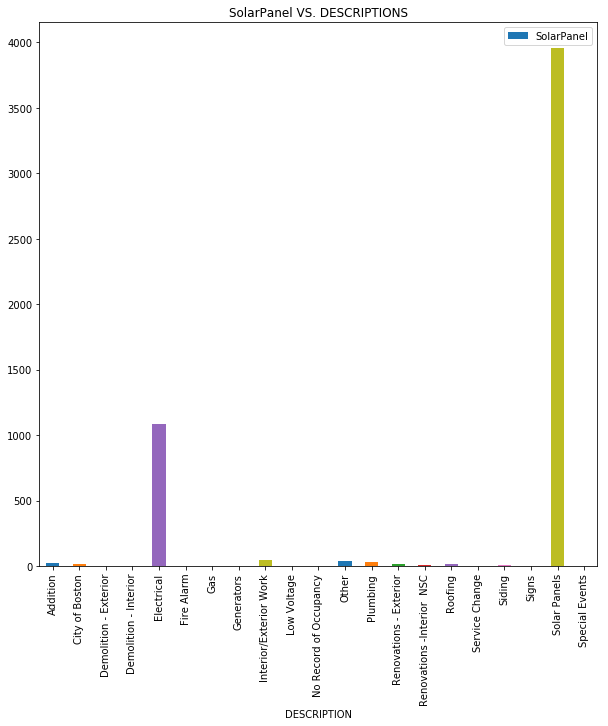

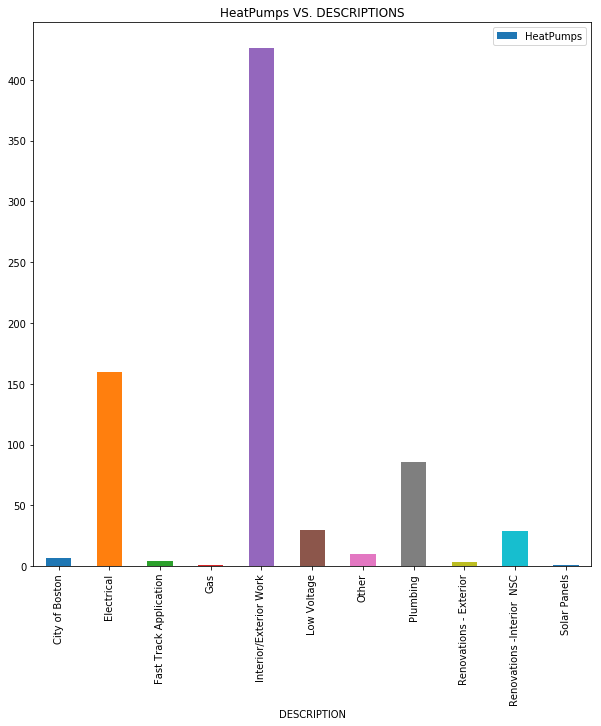

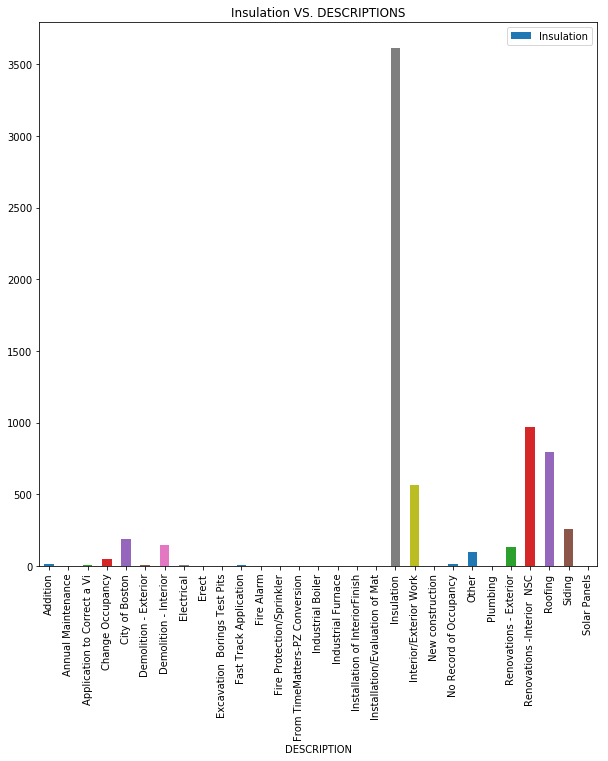

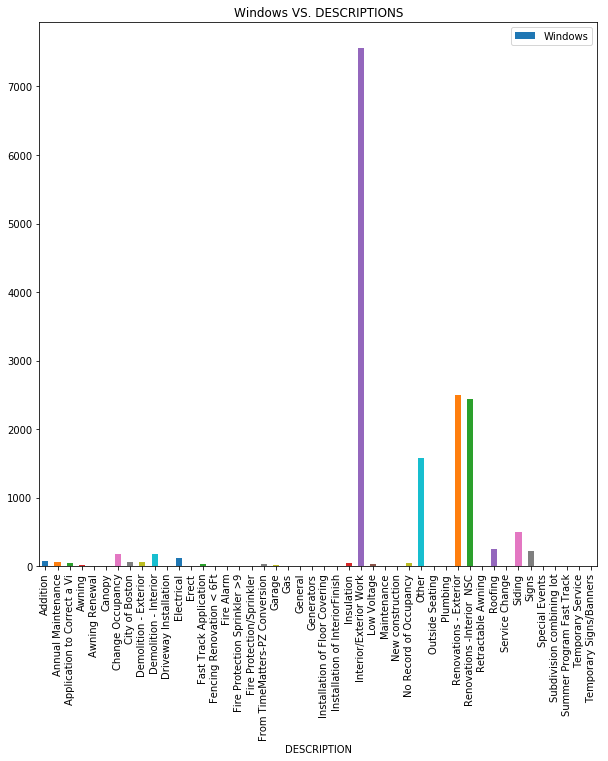

In [92]:
fulldata = list()
import numpy as np
for i in ["SolarPanel", "HeatPumps", "Insulation", "Windows"]:
    data = pd.DataFrame(permits.groupby(["DESCRIPTION", i], as_index = False).size().unstack().reset_index())
    data.columns = ['DESCRIPTION', 'NonTarget', i]
    data = data[~np.isnan(data[i])]
    fulldata.append(data)
    fig, ax = plt.subplots(figsize = (10,10))
    titlename = i + " VS. DESCRIPTIONS"
    data.plot(x = "DESCRIPTION", y = i, ax = ax, kind = "bar", title = titlename)
    plt.show()

In [93]:
fulldata

[                   DESCRIPTION  NonTarget  SolarPanel
 0                     Addition     1710.0        22.0
 10              City of Boston     4314.0        15.0
 12       Demolition - Exterior      950.0         1.0
 13       Demolition - Interior     4977.0         1.0
 16                  Electrical    78174.0      1085.0
 23                  Fire Alarm    19424.0         1.0
 29                         Gas    37462.0         1.0
 31                  Generators      427.0         1.0
 40      Interior/Exterior Work    20234.0        49.0
 41                 Low Voltage    28068.0         2.0
 45      No Record of Occupancy     1676.0         3.0
 46                       Other    13408.0        39.0
 48                    Plumbing    50383.0        28.0
 52      Renovations - Exterior    13482.0        12.0
 53  Renovations -Interior  NSC    33035.0         6.0
 57                     Roofing    12304.0        17.0
 59              Service Change     1979.0         1.0
 60       

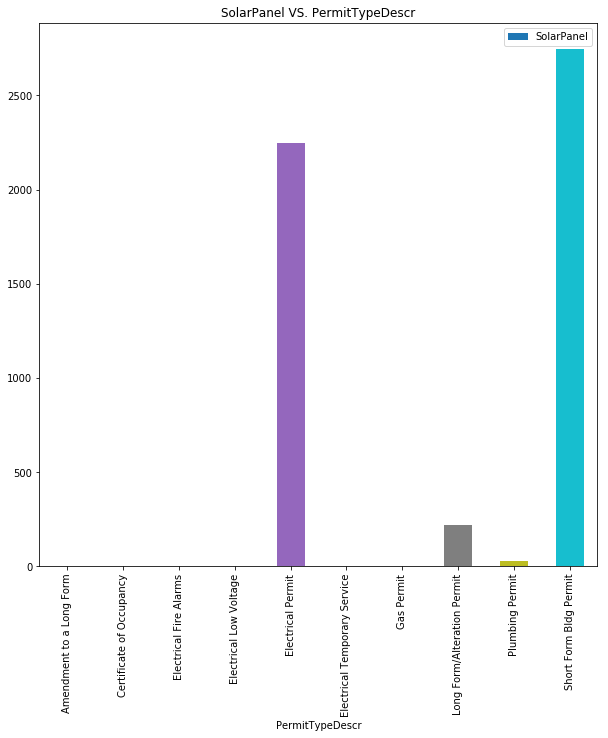

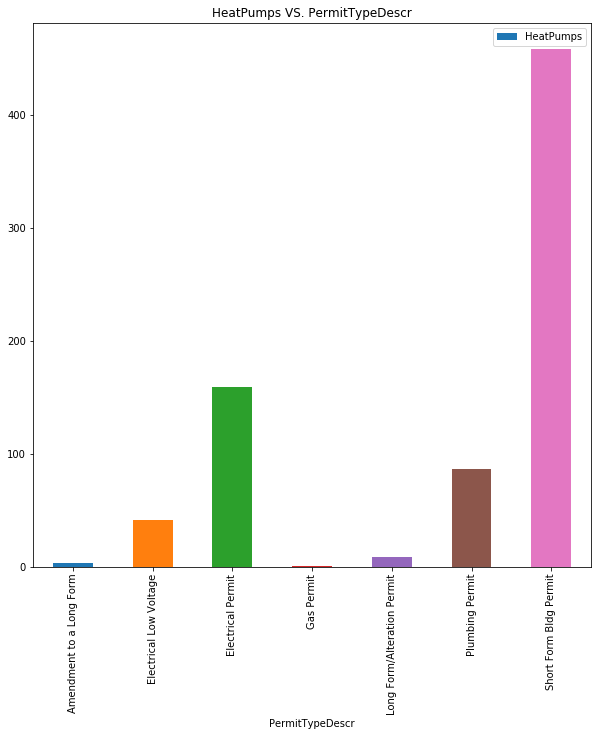

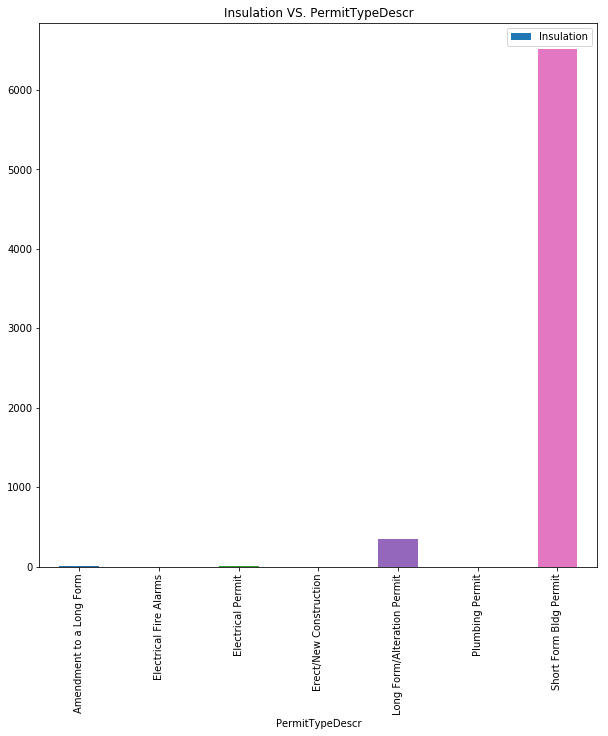

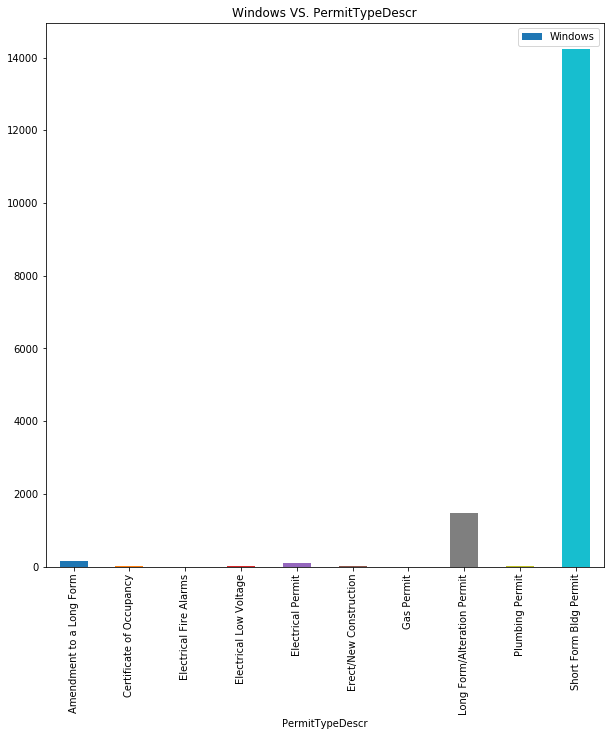

In [94]:
fulldata2 = pd.DataFrame()
import numpy as np
for i in ["SolarPanel", "HeatPumps", "Insulation", "Windows"]:
    data = pd.DataFrame(permits.groupby(["PermitTypeDescr", i], as_index = False).size().unstack().reset_index())
    data.columns = ['PermitTypeDescr', 'NonTarget', i]
    data = data[~np.isnan(data[i])]
    fulldata = fulldata2.append(data)
    fig, ax = plt.subplots(figsize = (10,10))
    titlename = i + " VS. PermitTypeDescr"
    data.plot(x = "PermitTypeDescr", y = i, ax = ax, kind = "bar", title = titlename)
    plt.show()